In [31]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## Loading Data

In [32]:
data=np.genfromtxt("test.csv", delimiter=',', skip_header=1)

In [33]:
x_train=data[:,0]
y_train=data[:,1]

In [34]:
#computing the cost

def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0

    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+((f_wb-y[i])**2)
    total_cost=cost/(2*m)

    return total_cost


In [35]:
#compute the derivative terms

def compute_grad(x, y, w, b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=(f_wb-y[i])
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i
    
    dj_dw=(dj_dw)/m 
    dj_db=(dj_db)/m 

    return dj_dw, dj_db

In [36]:
#compute the gradient descent

def grad_desc(x,y,w_in,b_in,n_iter,cost_func, alpha, grad_func):
    w=copy.deepcopy(w_in)
    j_hist=[]
    wb_hist=[]
    b=b_in

    for i in range(n_iter):
        dj_dw, dj_db=grad_func(x,y,w,b)

        b=b-alpha*dj_db
        w=w-alpha*dj_dw

        if i<100000:
            j_hist.append( cost_func(x,y,w,b))
            wb_hist.append([w,b])

        if i% math.ceil(n_iter/10) == 0:
             print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    return w,b,j_hist,wb_hist

In [45]:
## running grdient descent to minimise the cost function

w_init=0
b_init=0
n_it=100000
alph=1.0e-4

w, b, j_h, wb_h = grad_desc(x_train, y_train, w_init, b_init, n_it, compute_cost, alph, compute_grad )
print(f"(w,b) found by gradient descent : ({w:8.4f},{b:8.4f})")


Iteration    0: Cost 7.56e+02  dj_dw: -3.430e+03, dj_db: -5.121e+01   w:  3.430e-01, b: 5.12051e-03
Iteration 10000: Cost 4.60e+00  dj_dw: -1.338e-03, dj_db:  8.941e-02   w:  1.009e+00, b:-8.58721e-02
Iteration 20000: Cost 4.59e+00  dj_dw: -1.055e-03, dj_db:  7.048e-02   w:  1.010e+00, b:-1.65441e-01
Iteration 30000: Cost 4.59e+00  dj_dw: -8.314e-04, dj_db:  5.557e-02   w:  1.011e+00, b:-2.28169e-01
Iteration 40000: Cost 4.59e+00  dj_dw: -6.555e-04, dj_db:  4.380e-02   w:  1.012e+00, b:-2.77621e-01
Iteration 50000: Cost 4.58e+00  dj_dw: -5.167e-04, dj_db:  3.453e-02   w:  1.012e+00, b:-3.16605e-01
Iteration 60000: Cost 4.58e+00  dj_dw: -4.074e-04, dj_db:  2.722e-02   w:  1.013e+00, b:-3.47339e-01
Iteration 70000: Cost 4.58e+00  dj_dw: -3.211e-04, dj_db:  2.146e-02   w:  1.013e+00, b:-3.71567e-01
Iteration 80000: Cost 4.58e+00  dj_dw: -2.532e-04, dj_db:  1.692e-02   w:  1.013e+00, b:-3.90668e-01
Iteration 90000: Cost 4.58e+00  dj_dw: -1.996e-04, dj_db:  1.334e-02   w:  1.013e+00, b:-4.0

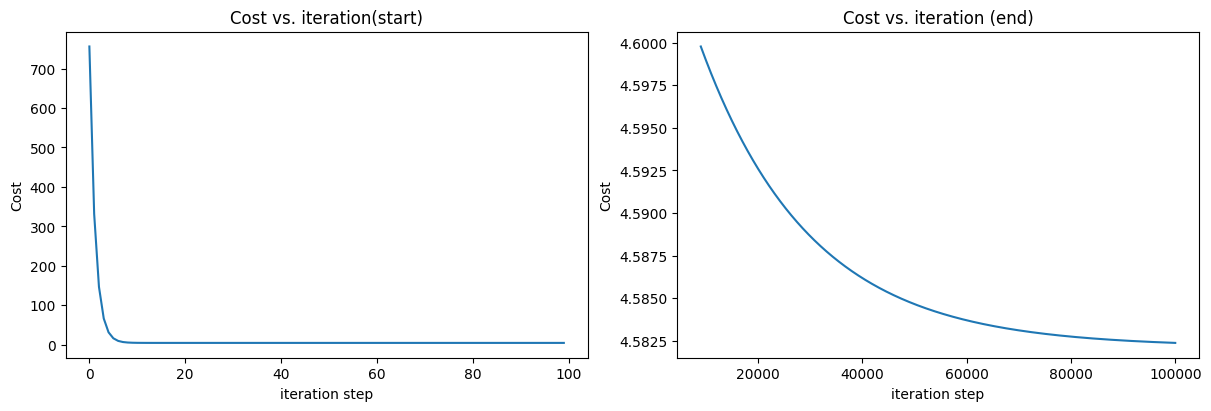

In [50]:
## plot the initial vs final cost vs iterations

fig, (ax1,ax2)=plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_h[:100])
ax2.plot(9000+np.arange(len(j_h[9000:])), j_h[9000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()